In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtpl

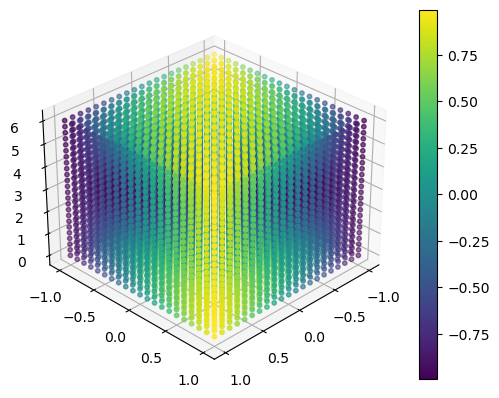

0.995
-0.995


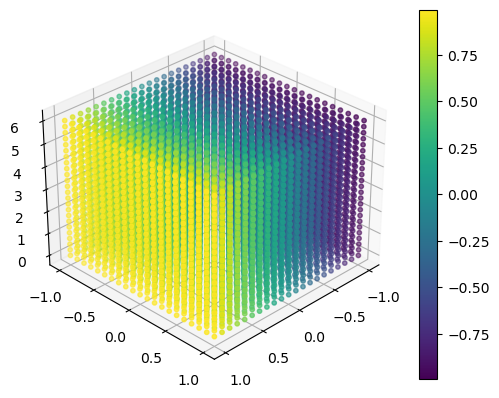

0.995
-0.995


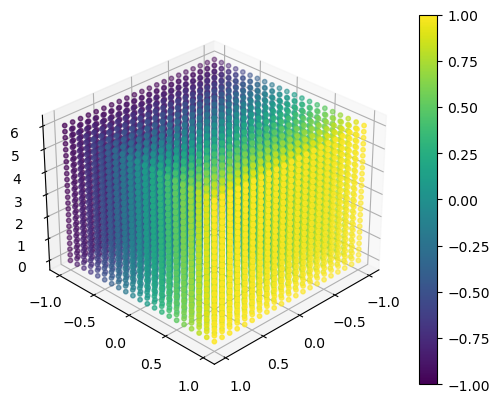

1.0
-1.0


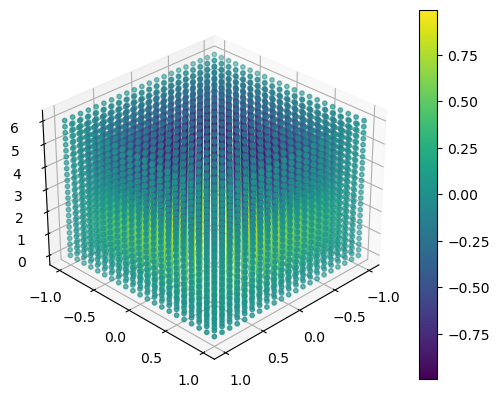

0.995
-0.995


In [79]:
varNames = ["a","A","B","D"]

data_hash = {}

do_ang = False

for name in varNames: 
    filename = f"build/{name}_simple_pos.txt"
    
    data = np.loadtxt(filename)
    #print(data.shape)
    z_vals = int(np.sqrt(data.shape[0]))
    x_max = z_vals//2 

    data = np.array(np.split(data,z_vals,axis=0))
    x, y, z = np.indices(data.shape)

    
    z = z/(z.max()+1)*2*np.pi
    x = (x-x_max)/x_max
    y = (y-x_max)/x_max
    if do_ang:
        x = np.arccos(x)
        y = np.arccos(y)
    
    data_hash[name] = [data,x,y,z]

    #print(data.shape)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.view_init(elev=30,azim=45)
    scat = ax.scatter(x.flatten(),y.flatten(),z.flatten(),c = data.flatten(),s=10)
    fig.colorbar(scat)
    plt.show()

    print(data.max())
    print(data.min())

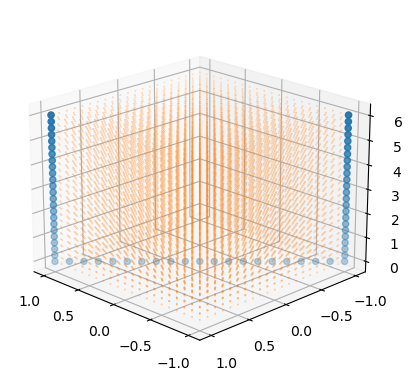

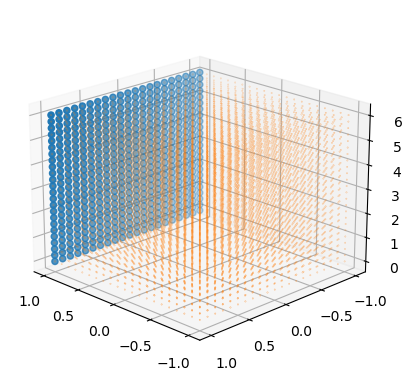

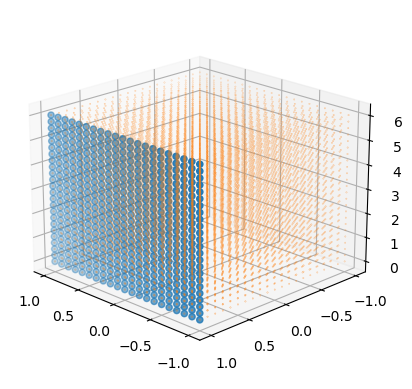

[0.] [0.] [1.57079633]


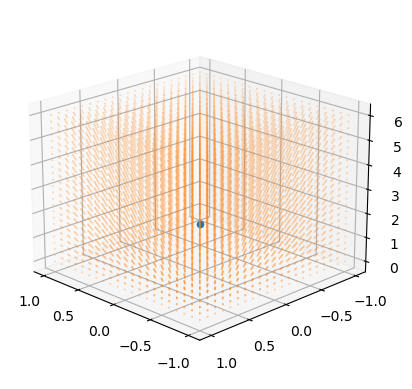

In [81]:
for name in varNames:         
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    data, x, y ,z = data_hash[name]
    max_mask = np.where(data==data.max())
    ax.view_init(elev=20,azim=135)
    if name == "D":
        print(x[max_mask],y[max_mask],z[max_mask])
    scat = ax.scatter(x[max_mask].flatten(),y[max_mask].flatten(),z[max_mask].flatten(),s=20)
    scat = ax.scatter(x.flatten(),y.flatten(),z.flatten(),s=0.05)
    plt.show()
